In [5]:
import pandas as pd

from news_vec.utils import read_json_gz_lines

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns

mpl.style.use('seaborn-muted')
sns.set(style="whitegrid")

In [7]:
df = pd.DataFrame(read_json_gz_lines('../../data/clf-ab-acc.json/'))

In [10]:
df['label'] = df[['d1', 'd2']].apply(lambda x: f'{x[0]} - {x[1]}', axis=1)

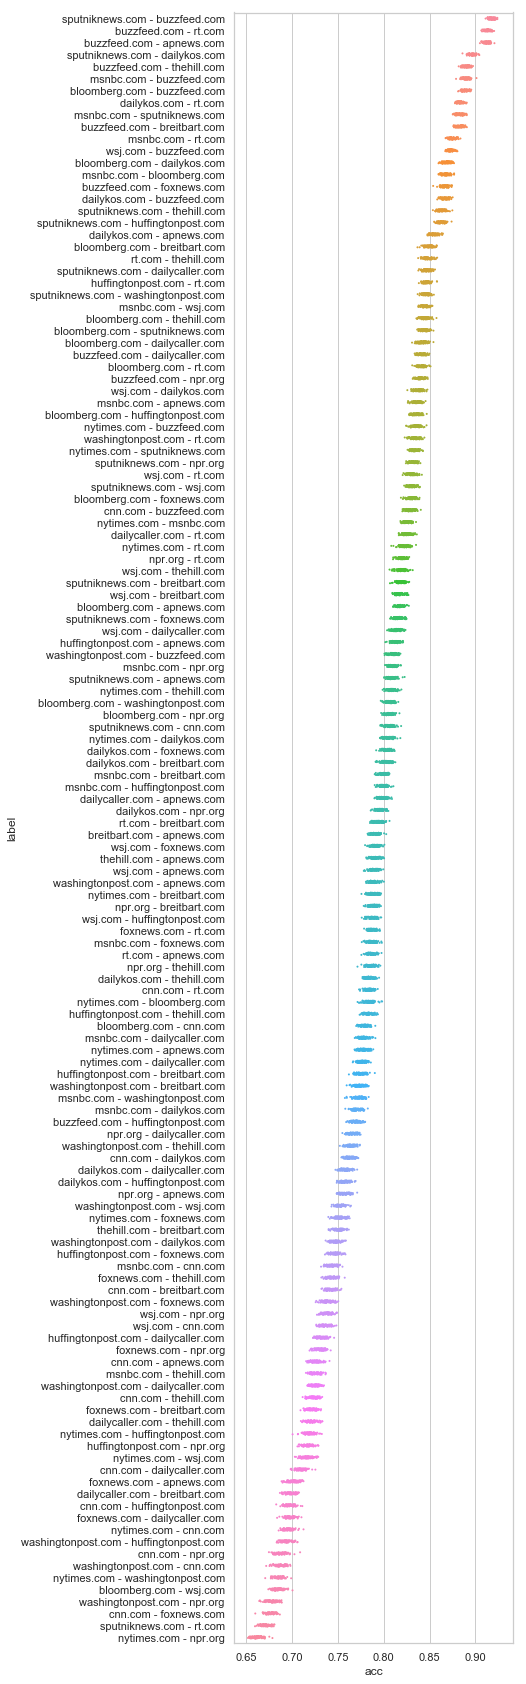

In [11]:
order = df.groupby('label').mean().acc.sort_values(ascending=False).index
plt.figure(figsize=(5,30))
sns.stripplot(x='acc', y='label', data=df, order=order, s=2)

In [14]:
mean_df = df.groupby(['d1', 'd2', 'label']).mean().reset_index()

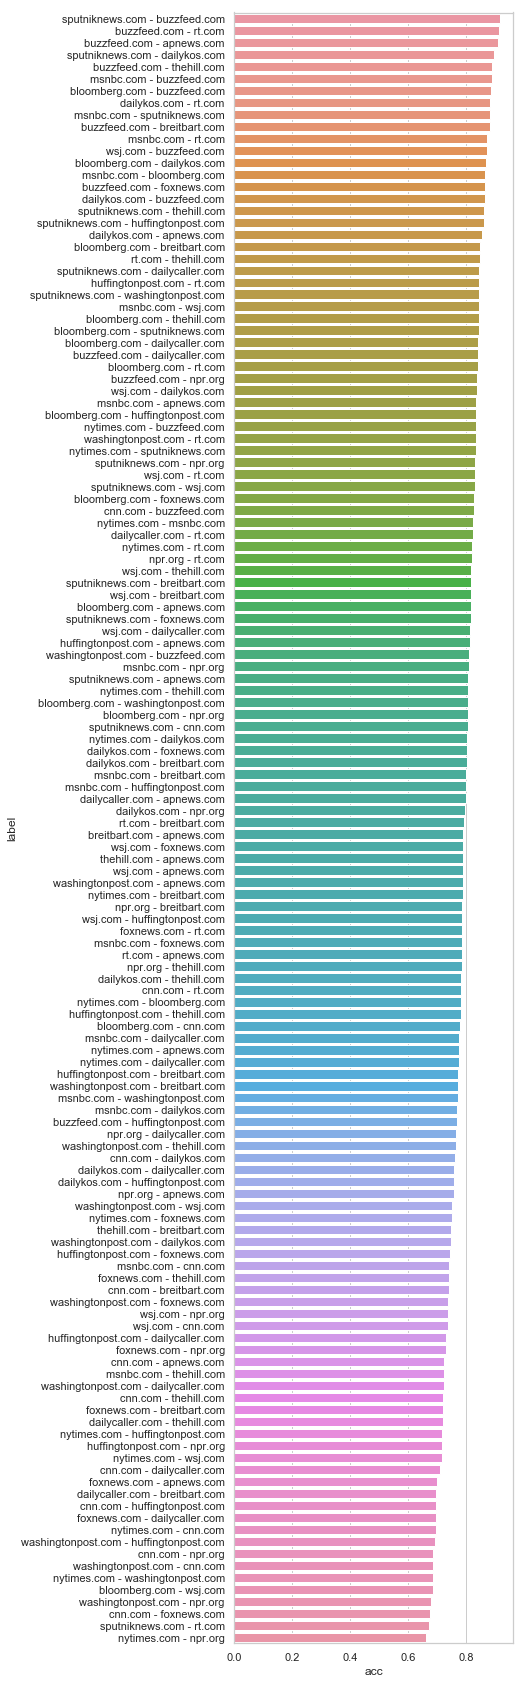

In [17]:
order = mean_df.sort_values('acc', ascending=False).label
plt.figure(figsize=(5,30))
sns.barplot(x='acc', y='label', data=mean_df, order=order)

In [22]:
out_df = mean_df.drop(columns=['label'])
out_df.to_json('data/hl-graph-lr-ab-acc.json', orient='records', lines=True)